In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

In [2]:
data = pd.read_csv('updated_Movie_Masterdata.csv')


In [3]:
#print(data.info())
#print(data.head())
#print(data.isnull().sum())
data.shape

(5443, 9)

In [4]:
# Drop rows with missing values for simplicity
# Alternatively, missing values can be imputed depending on the context
data = data.dropna()
data.shape


(5443, 9)

In [5]:
# Encode categorical variables
# Example: If 'Category' is a categorical column, we convert it into numerical labels
label_encoder = LabelEncoder()
data['Category_Encoded'] = label_encoder.fit_transform(data['Category'])
data.head()

,Film,Name,Category,Year_Film,Year_Ceremony,Critic_Score,Audience_Score,Winner,Unique_Group_ID,Category_Encoded
0,...And Justice for All,"Valerie Curtin, Barry Levinson",WRITING (Screenplay Written Directly for the S...,1979,1980,0.83,0.80,False,1,75
1,...And Justice for All,Al Pacino,ACTOR IN A LEADING ROLE,1979,1980,0.83,0.80,False,1,1
2,10,Music by Henry Mancini; Lyric by Robert Wells,MUSIC (Original Song),1979,1980,0.68,0.56,False,2,39
3,10,Music by Henry Mancini; Lyric by Robert Wells,MUSIC (Original Song),1979,1980,0.85,0.80,False,2,39
4,10,Henry Mancini,MUSIC (Original Score),1979,1980,0.85,0.80,False,2,33


In [6]:
# Define features (X) and target variable (y)
# Features: Critics' Score, Audience Score, and Category
# Target: Whether the movie won an Oscar (binary outcome: Won = 1, Lost = 0)
X = data[['Critic_Score', 'Audience_Score', 'Category_Encoded']]
y = data['Winner']
X.head(), y.head()

(   Critic_Score  Audience_Score  Category_Encoded
 0          0.83            0.80                75
 1          0.83            0.80                 1
 2          0.68            0.56                39
 3          0.85            0.80                39
 4          0.85            0.80                33,
 0    False
 1    False
 2    False
 3    False
 4    False
 Name: Winner, dtype: bool)

In [7]:
# Split the dataset into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Critic_Score,Audience_Score,Category_Encoded
1745,0.91,0.90,12
596,0.90,0.89,16
2420,0.90,0.69,70
1616,0.80,0.87,19
2689,0.89,0.88,74


In [8]:
# Standardize the feature values (scale them to have mean=0 and standard deviation=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Initialize the Random Forest Classifier
# Random Forest is chosen for its robustness and ability to handle feature importance
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

#Calculate the predicted probabilities for ROC-AUC evaluation
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred_proba

array([0.11860687, 0.1986357 , 0.23563032, ..., 0.48707737, 0.31222232,
       0.41587469])

In [10]:
# Evaluate the model using classification metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

       False       0.78      0.99      0.87       811
        True       0.85      0.21      0.33       278

    accuracy                           0.79      1089
   macro avg       0.82      0.60      0.60      1089
weighted avg       0.80      0.79      0.74      1089




AUC-ROC Score: 0.8028


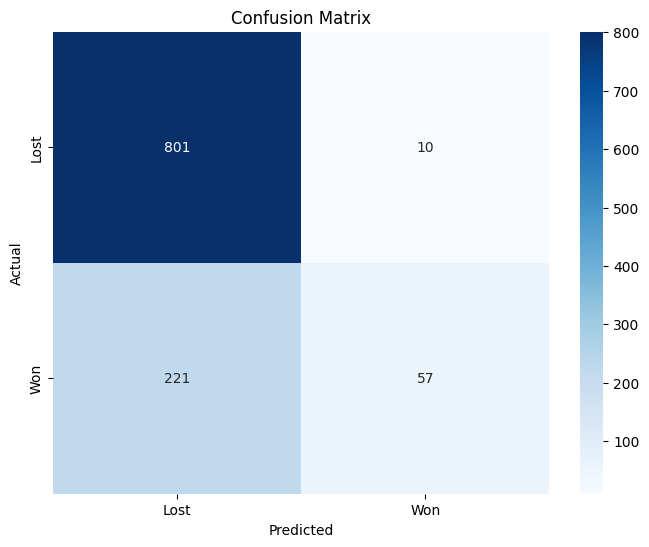

In [11]:
# Calculate and print the AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nAUC-ROC Score: {auc_score:.4f}")

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Feature Importance Analysis
# This helps understand which features contribute the most to the predictions
importances = model.feature_importances_
feature_names = ['Critics_Score', 'Audience_Score', 'Category_Encoded']
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n")
print(importance_df)


Feature Importances:

            Feature  Importance
2  Category_Encoded    0.340057
0     Critics_Score    0.335340
1    Audience_Score    0.324603


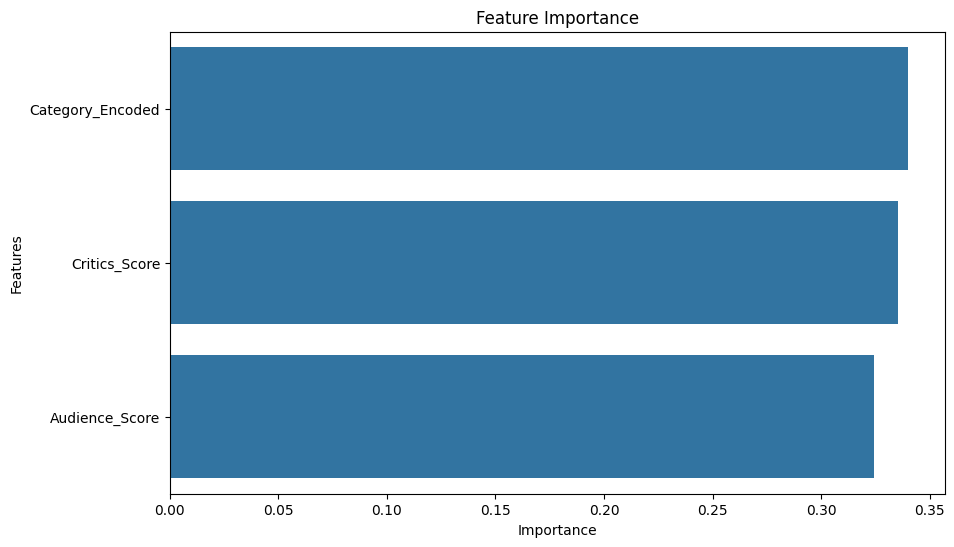

In [13]:
# Plot feature importances for better visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [14]:
# Save the trained model for future use
# Useful if you plan to deploy the model later
import joblib
joblib.dump(model, 'oscar_prediction_model.pkl')
print("\nModel saved as 'oscar_prediction_model.pkl'.")


Model saved as 'oscar_prediction_model.pkl'.


In [15]:
# Multiply Critics_Score and Audience_Score by 100 to convert to percentages
data['Critic_Score'] *= 100
data['Audience_Score'] *= 100

# Verify the changes
print(data[['Critic_Score', 'Audience_Score']].head())

   Critic_Score  Audience_Score
0          83.0            80.0
1          83.0            80.0
2          68.0            56.0
3          85.0            80.0
4          85.0            80.0


In [16]:
# Retrieving all the original fields from the dataset for the test set
## We're filtering the rows from the original dataset to only include movies that are part of the testset (X_test) using indices of X_test
test_data_with_predictions = X_test.copy()
original_test_data = data.loc[X_test.index].copy()
original_test_data.head()

original_test_data['Predicted_Award_Outcome'] = y_pred  # Predicted labels
original_test_data['Prediction_Probability_Win'] = y_pred_proba  # Probabilities for class 1
original_test_data

,Film,Name,Category,Year_Film,Year_Ceremony,Critic_Score,Audience_Score,Winner,Unique_Group_ID,Category_Encoded,Predicted_Award_Outcome,Prediction_Probability_Win
1186,Death of a Salesman,Mildred Dunnock,ACTRESS IN A SUPPORTING ROLE,1951,1952,100.0,77.0,False,278,5,False,0.118607
4764,The Remains of the Day,"Mike Nichols, John Calley and Ismail Merchant,...",BEST PICTURE,1993,1994,96.0,90.0,False,1103,12,False,0.198636
410,Apocalypse Now,"Walter Murch, Mark Berger, Richard Beggs, Nat ...",SOUND,1979,1980,97.0,94.0,True,91,55,False,0.235630
1945,Inception,"Emma Thomas and Christopher Nolan, Producers",BEST PICTURE,2010,2011,87.0,91.0,False,474,12,False,0.418044
3848,The Deer Hunter,Vilmos Zsigmond,CINEMATOGRAPHY,1978,1979,86.0,91.0,False,946,13,False,0.476576
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Elvis,"David Lee, Wayne Pashley, Andy Nelson and Mich...",SOUND,2022,2023,77.0,94.0,False,315,55,False,0.212511
1041,Close Encounters of the Third Kind,"Roy Arbogast, Douglas Trumbull, Matthew Yurici...",VISUAL EFFECTS,1977,1978,90.0,85.0,False,236,65,False,0.287378
2231,Lenny,Bob Fosse,DIRECTING,1974,1975,87.0,88.0,False,541,19,False,0.487077
2464,Minari,Steven Yeun,ACTOR IN A LEADING ROLE,2020,2021,98.0,87.0,False,612,1,False,0.312222


In [17]:
excel_output = "final_test_data.csv"
original_test_data.to_csv(excel_output, index=False)